In [63]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

In [64]:
#Dataset is being called from sklearn.dataset library to perform L2 regulation or Ridge regression
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
housing
df = housing.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [65]:
X  = housing.data
y = housing.target
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [66]:
#train test split method has been applied in the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)


In [67]:
#Standarising the training dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
#ridge regression object is being created
lasso_regg = Lasso()
lasso_regg

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [81]:
# parameter tunning is performed in this section using grid search cv to choose best fit parameter
parameters = {'alpha':[0.00001,0.00005,1]}
lassocv = GridSearchCV(lasso_regg,parameters,scoring='neg_mean_squared_error',cv=5)
#Now model is being trained
lassocv.fit(X_train,y_train)

,estimator,Lasso()
,param_grid,"{'alpha': [1e-05, 5e-05, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,5e-05


In [82]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 5e-05}
-0.5192614414374241


In [83]:
#now model is being predicted on the basis of X_test data to predict y_test
lasso_pred = lassocv.predict(X_test)


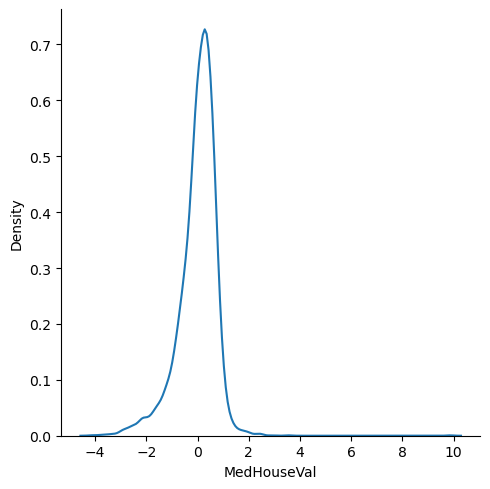

In [84]:
sns.displot(lasso_pred - y_test,kind='kde')

In [85]:
from sklearn.metrics import r2_score
score = r2_score(lasso_pred,y_test)
score

0.33743249454555146

In [86]:
comparison_df = pd.DataFrame({'Actual' :y_test, 'predicted' :lasso_pred})
#this is the comparision between Actual and predicted outputs
print(comparison_df)

        Actual  predicted
20046  0.47700   0.719464
3024   0.45800   1.763860
15663  5.00001   2.708962
20484  2.18600   2.838865
9814   2.78000   2.604358
...        ...        ...
15362  2.63300   1.992176
16623  2.66800   2.249511
18086  5.00001   4.468464
2144   0.72300   1.188047
3665   1.51500   2.009111

[4128 rows x 2 columns]


# Doing linear regression for the same dataset 

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [97]:
lin_reg = LinearRegression()
lin_reg

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [98]:
lin_reg.fit(X_train,y_train)
lin_pred = lin_reg.predict(X_test)

In [99]:
lin_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251], shape=(4128,))

In [100]:
compare_df = pd.DataFrame({'actual':y_test,'predicted':lin_pred})
print(compare_df)

        actual  predicted
20046  0.47700   0.719123
3024   0.45800   1.764017
15663  5.00001   2.709659
20484  2.18600   2.838926
9814   2.78000   2.604657
...        ...        ...
15362  2.63300   1.991746
16623  2.66800   2.249839
18086  5.00001   4.468770
2144   0.72300   1.187511
3665   1.51500   2.009403

[4128 rows x 2 columns]


In [102]:
mse = cross_val_score(lin_reg,X,y,scoring='neg_mean_squared_error',cv=5)
print(np.mean(mse))

-0.5582901717686578


In [103]:
from sklearn import metrics

In [104]:
mae = metrics.mean_absolute_error(y_test,lin_pred)

In [105]:
mae

0.5332001304956565

In [106]:
maes = metrics.mean_absolute_error(y_test,lasso_pred)
maes

0.5331958749917826